In [ ]:
import google.auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive'

 3-resume.pdf  'Colab Notebooks'  'Copy of Training.csv'   DataSets


# **Fetching Dataset**

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/DataSets/Mall_Customers.csv')

dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# **Calculating number of Rows and Columns in Dataset**

In [ ]:
dataset.shape

(200, 5)

# **Calculating Null values in the Dataset**

In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **Describing Dataset**

In [ ]:
des=dataset.describe()
des

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Extracting Optimal Number of Columns**

In [ ]:

optimal_columns = des.loc['mean'].nlargest(3).index

optimal_data = dataset[optimal_columns]

print("Optimal columns:", optimal_columns)
print("Optimal data:")
print(optimal_data)


Optimal columns: Index(['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Optimal data:
     CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1                  15                      39
1             2                  15                      81
2             3                  16                       6
3             4                  16                      77
4             5                  17                      40
..          ...                 ...                     ...
195         196                 120                      79
196         197                 126                      28
197         198                 126                      74
198         199                 137                      18
199         200                 137                      83

[200 rows x 3 columns]


In [ ]:
X= dataset.iloc[:, [3,4]].values

# **Finding Optimal value of K**

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

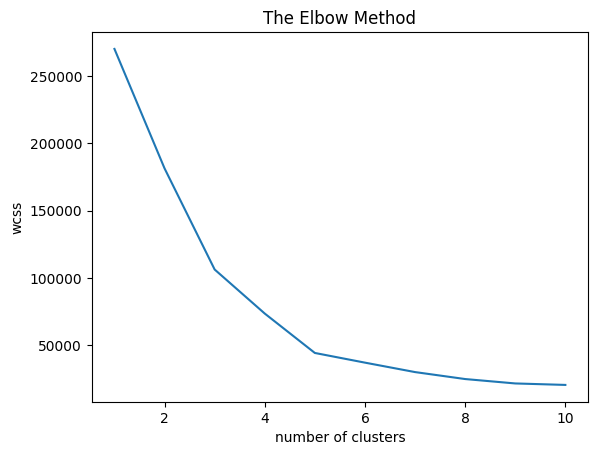

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

# **Applying k-means Algorithm**

In [ ]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


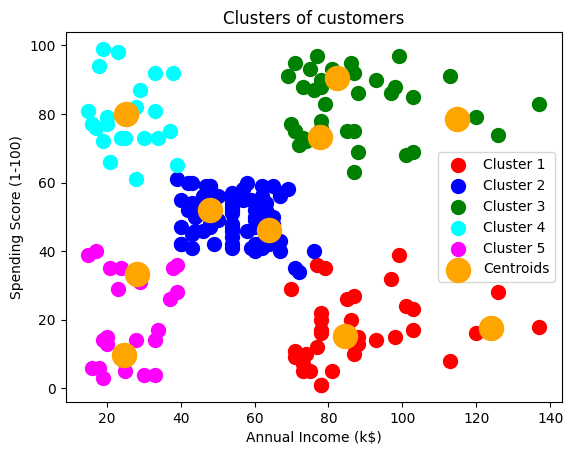

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
dataset['Class'] = y_kmeans
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


## **Targated Marketing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])



Cluster Summary Statistics:



       CustomerID    Gender        Age  Annual Income (k$)  \
Class                                                        
0      115.333333  0.500000  43.291667           66.937500   
1      115.157895  0.421053  30.175439           66.070175   
2       83.255319  0.382979  27.617021           53.276596   
3       85.145833  0.458333  55.708333           54.770833   

       Spending Score (1-100)  
Class                          
0                   15.020833  
1                   82.350877  
2                   49.148936  
3                   48.229167  





<ipython-input-26-dbc691d1fc6f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=dataset, palette='viridis')


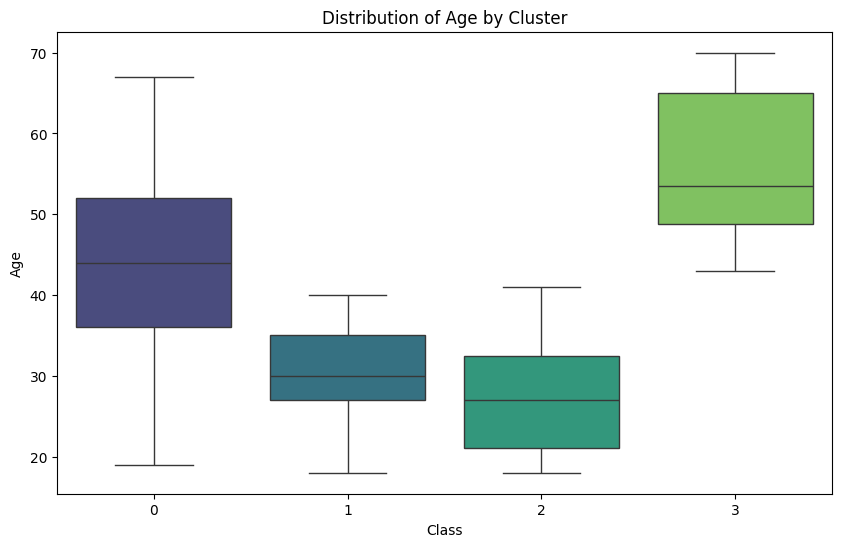

<ipython-input-26-dbc691d1fc6f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=dataset, palette='viridis')


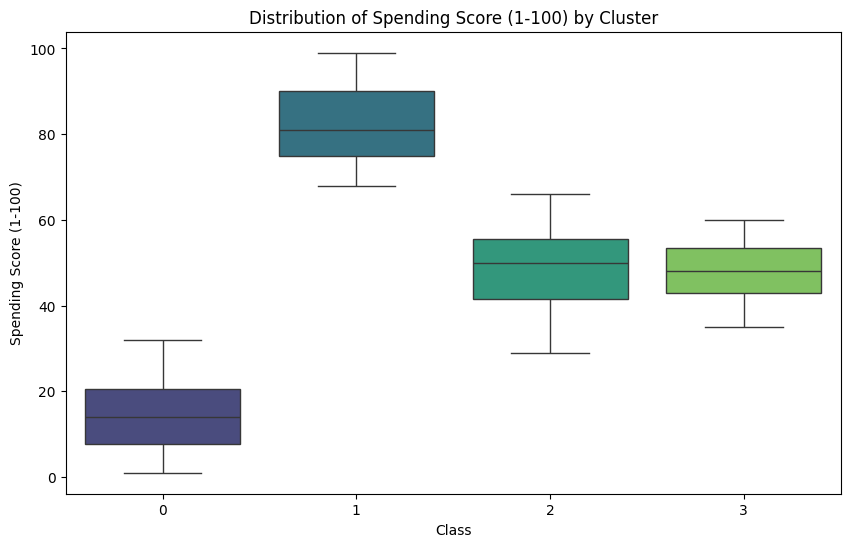

In [ ]:

cluster_summary = dataset.groupby('Class').mean()
print("Cluster Summary Statistics:")
print('\n\n')
print(cluster_summary)
print('\n\n')
import seaborn as sns
for feature in ['Age', 'Spending Score (1-100)']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=dataset, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [ ]:
for cluster in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster]
    print(f"Marketing Strategy for Cluster {cluster}:")
    if cluster == 0:
        print("High-spending customers: Focus on premium products and exclusive offers.")
        print("Consider personalized shopping experiences and luxury loyalty programs.")
    elif cluster == 1:
        print("Moderate-spending, younger customers: Focus on trendy, affordable options and promotions.")
        print("Consider social media marketing and limited-time discounts.")
    elif cluster == 2:
        print("Low-spending, middle-aged customers: Focus on family-oriented products and loyalty programs.")
        print("Consider personalized recommendations and family discounts.")
    elif cluster == 3:
        print("Moderate-spending, older customers: Focus on quality products and senior discounts.")
        print("Consider personalized services and loyalty rewards.")
    print("\n")

marketing_campaign = {
    'Cluster': [],
    'Strategy': [],
    'Actions': []
}

for cluster in dataset['Class'].unique():
    if cluster == 0:
        strategy = "Focus on premium products and exclusive offers."
        actions = "Personalized shopping experiences, luxury loyalty programs"
    elif cluster == 1:
        strategy = "Focus on trendy, affordable options and promotions."
        actions = "Social media marketing, limited-time discounts"
    elif cluster == 2:
        strategy = "Focus on family-oriented products and loyalty programs."
        actions = "Personalized recommendations, family discounts"
    elif cluster == 3:
        strategy = "Focus on quality products and senior discounts."
        actions = "Personalized services, loyalty rewards"




Marketing Strategy for Cluster 2:
Low-spending, middle-aged customers: Focus on family-oriented products and loyalty programs.
Consider personalized recommendations and family discounts.


Marketing Strategy for Cluster 1:
Moderate-spending, younger customers: Focus on trendy, affordable options and promotions.
Consider social media marketing and limited-time discounts.


Marketing Strategy for Cluster 0:
High-spending customers: Focus on premium products and exclusive offers.
Consider personalized shopping experiences and luxury loyalty programs.


Marketing Strategy for Cluster 3:
Moderate-spending, older customers: Focus on quality products and senior discounts.
Consider personalized services and loyalty rewards.




In [ ]:
n=int(input())
condition = dataset['Class'] ==n
filtered_df = dataset[condition]
filtered_df.head(10)


1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
43,44,0,31,39,61,1
46,47,0,50,40,55,1
47,48,0,27,40,47,1
48,49,0,29,40,42,1
49,50,0,31,40,42,1
50,51,0,49,42,52,1
51,52,1,33,42,60,1
52,53,0,31,43,54,1
53,54,1,59,43,60,1
54,55,0,50,43,45,1
